In [149]:
from data_preparation.basics import *
from data_exploration import *

tasks = ['CYP2C19', 'CYP2D6', 'CYP3A4', 'CYP1A2', 'CYP2C9']

In [150]:
# create and save the datasets

full_datasets = {}
null_full_datasets =  {}
for task in tasks:
    full_datasets[task] = get_full_dataset(task)
    null_full_datasets[task] = extract_null(full_datasets[task]) 

In [151]:
all_drugs = []
null_all_drugs = []
for task in tasks:
    print(f"{len(null_full_datasets[task]['Drug_ID'])/len(full_datasets[task]['Drug_ID'])*100:.3f}% of molecules in {task} have NaN values.")
    all_drugs = all_drugs + [drug for drug in full_datasets[task]["Drug_ID"]]
    null_all_drugs = null_all_drugs + [drug for drug in null_full_datasets[task]["Drug_ID"]]


all_drugs = set(all_drugs)
null_all_drugs = set(null_all_drugs)
print(f"\nTotal number of molecules in all datasets: {len(all_drugs)}\nTotal number of molecules with NaN values: {len(null_all_drugs)}")

1.200% of molecules in CYP2C19 have NaN values.
1.196% of molecules in CYP2D6 have NaN values.
1.274% of molecules in CYP3A4 have NaN values.
1.177% of molecules in CYP1A2 have NaN values.
1.307% of molecules in CYP2C9 have NaN values.

Total number of molecules in all datasets: 16366
Total number of molecules with NaN values: 181


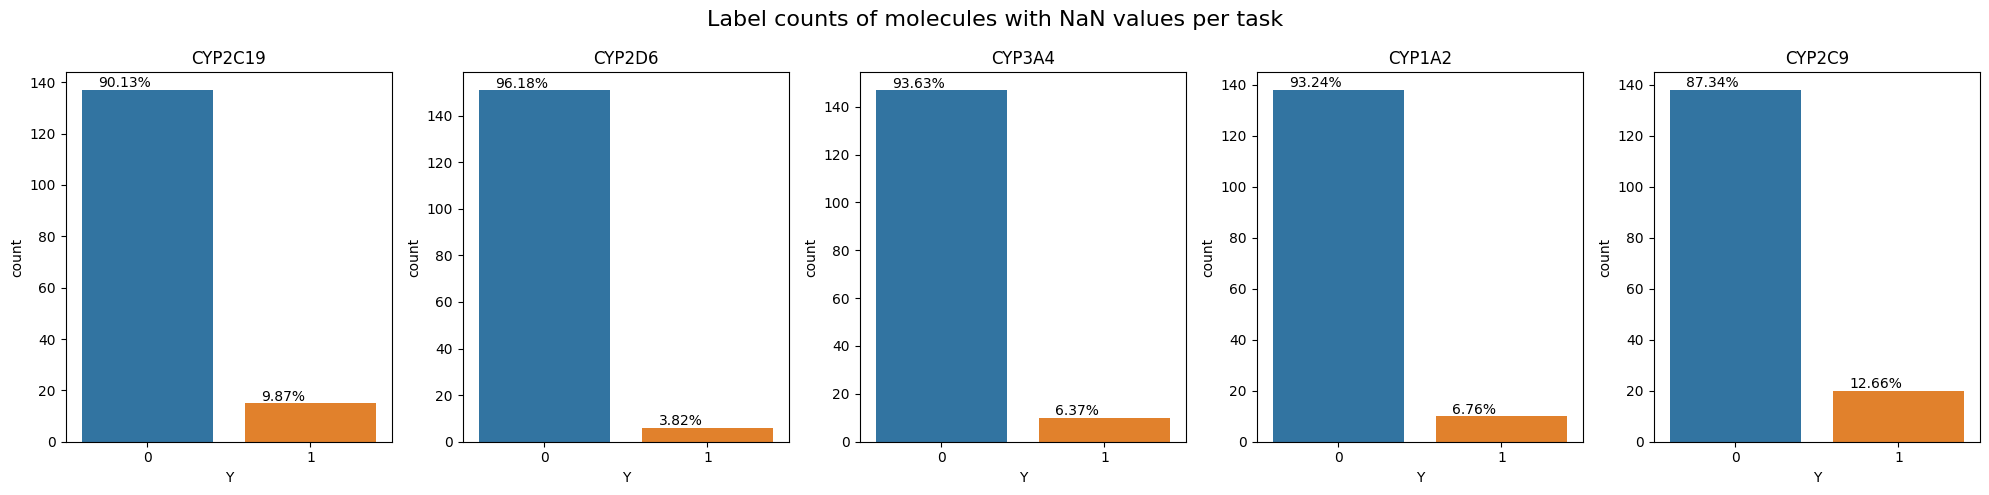

In [152]:
plot_counts([null_full_datasets[task]["Y"] for task in tasks], tasks, suptitle="Label counts of molecules with NaN values per task")

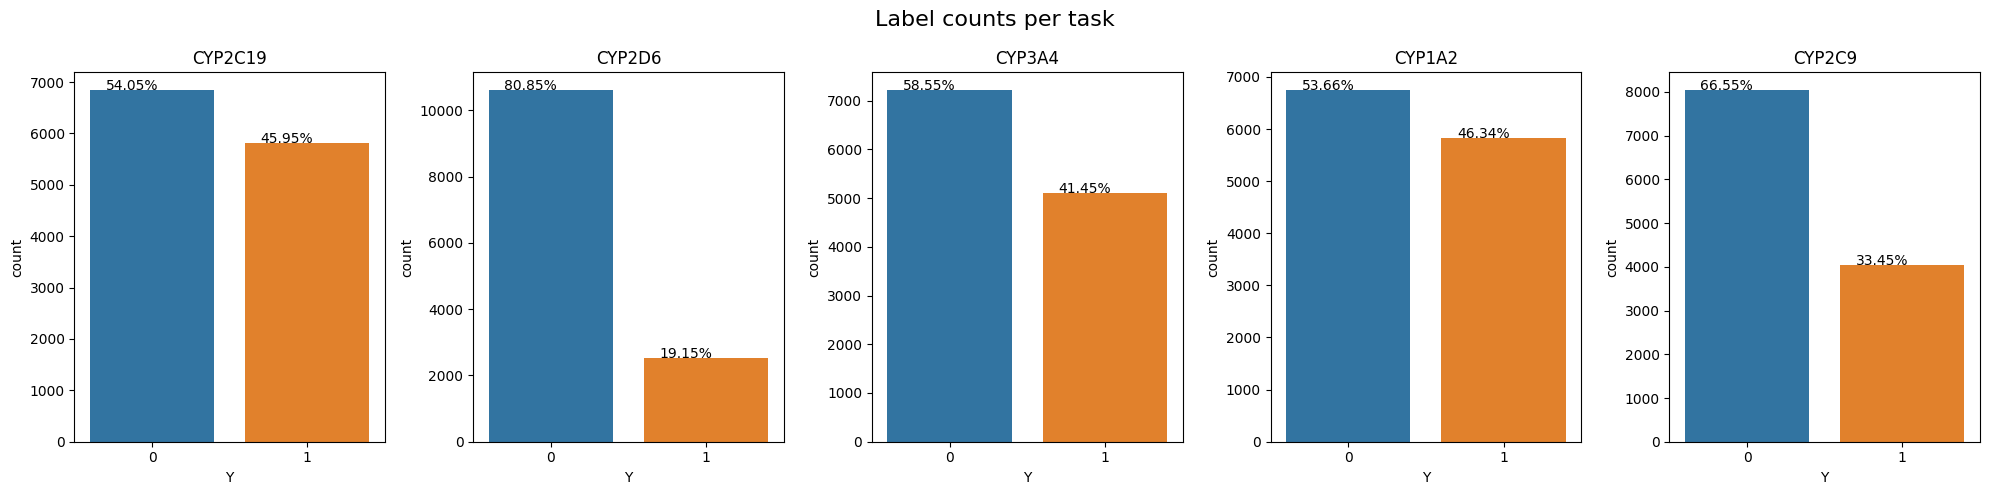

In [153]:
plot_counts([full_datasets[task]["Y"] for task in tasks], tasks, suptitle="Label counts per task")

In [154]:
nan_columns = []
for task in tasks:
    nan_columns += list(null_full_datasets[task].columns)

nan_columns = set(nan_columns)

nan_columns.remove("Y")
nan_columns.remove("Drug")
nan_columns.remove("Drug_ID")

print("RDKit descriptors with NaN values:")
nan_columns

RDKit descriptors with NaN values:


{'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'MaxAbsPartialCharge',
 'MaxPartialCharge',
 'MinAbsPartialCharge',
 'MinPartialCharge'}

In [156]:
task = tasks[1]
dataset = full_datasets[task].drop("Unnamed: 0", axis=1)
dataset = dataset[~dataset.isna().any(axis=1)] # drop NaN rows
dataset = dataset.drop(["Drug", "Drug_ID"], axis=1)
dataset = dataset.corr()[nan_columns].abs()
dataset = dataset[dataset > 0.6]
dataset = dataset[~dataset.isna().all(axis=1)]

print(f"Absolute Correlation above 0.6 for task {task}")
dataset.drop(nan_columns, axis=0)

Absolute Correlation above 0.6 for task CYP2D6


,BCUT2D_MRLOW,MinPartialCharge,BCUT2D_CHGLO,BCUT2D_CHGHI,MaxPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWLOW,BCUT2D_LOGPLOW,BCUT2D_LOGPHI,BCUT2D_MWHI,BCUT2D_MRHI
Chi2n,NaN,NaN,0.657635,0.615886,NaN,NaN,NaN,0.612978,NaN,NaN,NaN,NaN
Chi3n,NaN,NaN,0.708089,0.673751,NaN,NaN,NaN,0.670548,NaN,0.662691,NaN,NaN
Chi3v,NaN,NaN,0.642868,0.636543,NaN,NaN,NaN,NaN,NaN,0.660912,NaN,NaN
Chi4n,NaN,NaN,0.729685,0.706302,NaN,NaN,NaN,0.704758,NaN,0.699046,NaN,NaN
Chi4v,NaN,NaN,0.664641,0.670465,NaN,NaN,NaN,NaN,NaN,0.702187,NaN,NaN
PEOE_VSA14,NaN,NaN,NaN,NaN,0.677696,NaN,0.663876,NaN,NaN,NaN,NaN,NaN
SlogP_VSA12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663359,0.629584
NumAliphaticHeterocycles,NaN,NaN,0.668484,NaN,NaN,NaN,NaN,NaN,0.600137,NaN,NaN,NaN
NumAliphaticRings,NaN,NaN,0.774556,0.768210,NaN,NaN,NaN,0.668561,0.647008,0.637940,NaN,NaN
NumSaturatedHeterocycles,NaN,NaN,0.645888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
print("A few example molecules:")
full_datasets[tasks[1]][["Y", "Drug"] + list(nan_columns)][5214:5222]

A few example molecules:


,Y,Drug,BCUT2D_MRLOW,MinPartialCharge,BCUT2D_CHGLO,BCUT2D_CHGHI,MaxPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWLOW,BCUT2D_LOGPLOW,BCUT2D_LOGPHI,BCUT2D_MWHI,BCUT2D_MRHI
5214,0,Cc1nn(-c2ccc(S(=O)(=O)O)cc2)c(O)c1N=Nc1ccc(-c2...,NaN,-0.505595,NaN,NaN,0.296145,0.505595,0.296145,NaN,NaN,NaN,NaN,NaN
5215,0,O=C(Nc1cccc(Cl)c1)Nn1cnnc1,0.259490,-0.306513,-2.065081,2.014422,0.337923,0.337923,0.306513,10.303787,-2.261761,2.139854,35.495691,6.304575
5216,0,O=C(O)c1c[nH]c2cc(OCc3ccccc3)ccc2c1=O,0.069509,-0.488836,-2.073151,2.112282,0.340715,0.488836,0.340715,10.128639,-2.147257,2.182315,16.477067,5.919956
5217,0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,NaN,-0.506848,NaN,NaN,0.201631,0.506848,0.201631,NaN,NaN,NaN,NaN,NaN
5218,0,Cc1ccc(S(=O)(=O)NC(=O)Nc2ncn[nH]2)cc1,0.256128,-0.275735,-2.065275,2.172531,0.335006,0.335006,0.275735,10.240356,-2.341872,2.093628,32.233271,7.896818
5219,0,NCC[Se][Se]CCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5220,0,CCN(CC)CCN1C(=O)c2cccc3cc(N)cc(c23)C1=O,0.059420,-0.398691,-2.290775,2.323544,0.261008,0.398691,0.261008,9.932291,-2.442250,2.313623,16.177525,6.254329
5221,1,CN1CCc2ccccc2[C@@H]1Cc1ccccc1NC(=O)c1sc2ccccc2...,0.102577,-0.320992,-2.347570,2.255874,0.266817,0.320992,0.266817,9.885137,-2.331365,2.364963,35.495694,7.213051


In [133]:
list(full_datasets[tasks[1]][["Y", "Drug"] + list(nan_columns)][5214:5224]["Drug"])

['Cc1nn(-c2ccc(S(=O)(=O)O)cc2)c(O)c1N=Nc1ccc(-c2ccc(N=Nc3ccc4c(S(=O)(=O)O)cc(S(=O)(=O)O)c(N)c4c3O)c(O)c2)cc1O.[Cu].[Cu]',
 'O=C(Nc1cccc(Cl)c1)Nn1cnnc1',
 'O=C(O)c1c[nH]c2cc(OCc3ccccc3)ccc2c1=O',
 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)(C(=O)CO)C[C@H]3O[C@H]1C[C@@H](N)[C@H](O)[C@@H](C)O1.[W]',
 'Cc1ccc(S(=O)(=O)NC(=O)Nc2ncn[nH]2)cc1',
 'NCC[Se][Se]CCN',
 'CCN(CC)CCN1C(=O)c2cccc3cc(N)cc(c23)C1=O',
 'CN1CCc2ccccc2[C@@H]1Cc1ccccc1NC(=O)c1sc2ccccc2c1Cl',
 'FC(F)(F)c1cc(NC(=S)N2c3ccccc3-n3cccc3[C@H]2c2cccnc2)cc(C(F)(F)F)c1',
 'O=S(=O)(c1cccc(C(F)(F)F)c1)N1c2ccccc2-n2cccc2[C@H]1c1cccnc1']